In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving student-mat.csv to student-mat (1).csv
User uploaded file "student-mat (1).csv" with length 56993 bytes


Once the file is uploaded, you can re-run the cell that was previously failing to load the CSV, or I can help you with that.

In [9]:
df = pd.read_csv("student-mat.csv")

# Display first 5 rows
df.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [16]:
# Dataset shape
df.shape

# Data types
df.dtypes

# Check missing values
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [17]:
df = df.drop_duplicates()

In [18]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [15]:
avg_g3 = df["G3"].mean()
avg_g3

np.float64(11.906009244992296)

In [14]:
df = pd.read_csv("student-por.csv", sep=';')

# Display first 5 rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [19]:
high_scores = df[df["G3"] > 15]
len(high_scores)

82

In [20]:
df["studytime"].corr(df["G3"])

np.float64(0.24978868999886314)

In [21]:
df.groupby("sex")["G3"].mean()

,G3
sex,
F,12.253264
M,11.406015


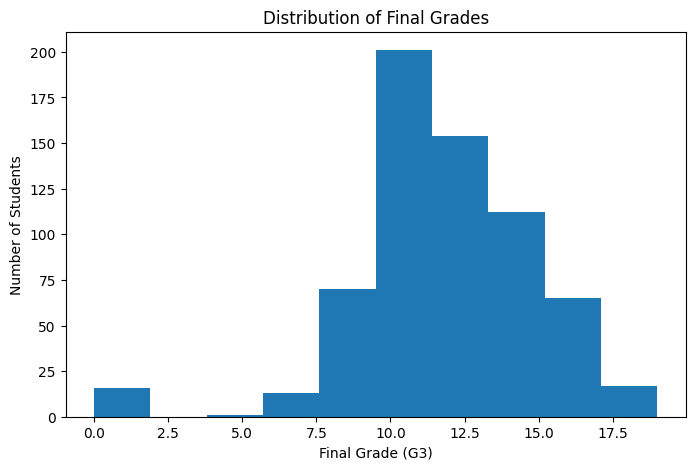

In [22]:
plt.figure(figsize=(8,5))
plt.hist(df["G3"], bins=10)
plt.title("Distribution of Final Grades")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.show()

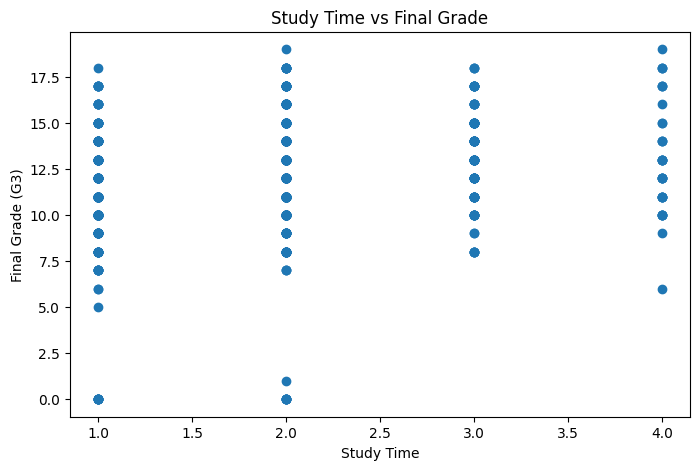

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(df["studytime"], df["G3"])
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time")
plt.ylabel("Final Grade (G3)")
plt.show()

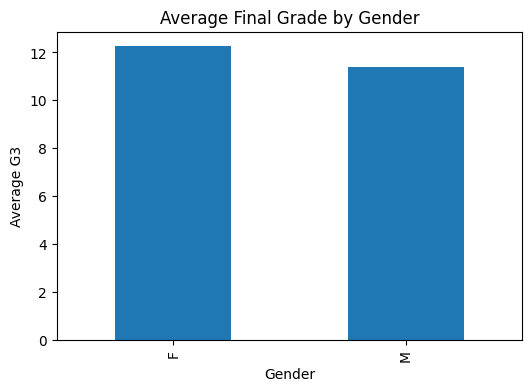

In [25]:
gender_avg = df.groupby("sex")["G3"].mean()

gender_avg.plot(kind="bar", figsize=(6,4))
plt.title("Average Final Grade by Gender")
plt.xlabel("Gender")
plt.ylabel("Average G3")
plt.show()

In [ ]:

# • The average final grade of students is calculated using the G3 column.
# • Several students scored above 15, showing good academic performance.
# • Study time shows a positive correlation with grades.
# • Gender-wise analysis reveals the difference in academic performance between male and female students.
# • Visualizations help us clearly understand grade distribution and trends.